In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [8]:
print(df.Seller_Type.value_counts())


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [9]:
print(df.Transmission.value_counts())


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [12]:
# encoding Categorical data
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
df.drop('Car_Name',axis=1,inplace=True)

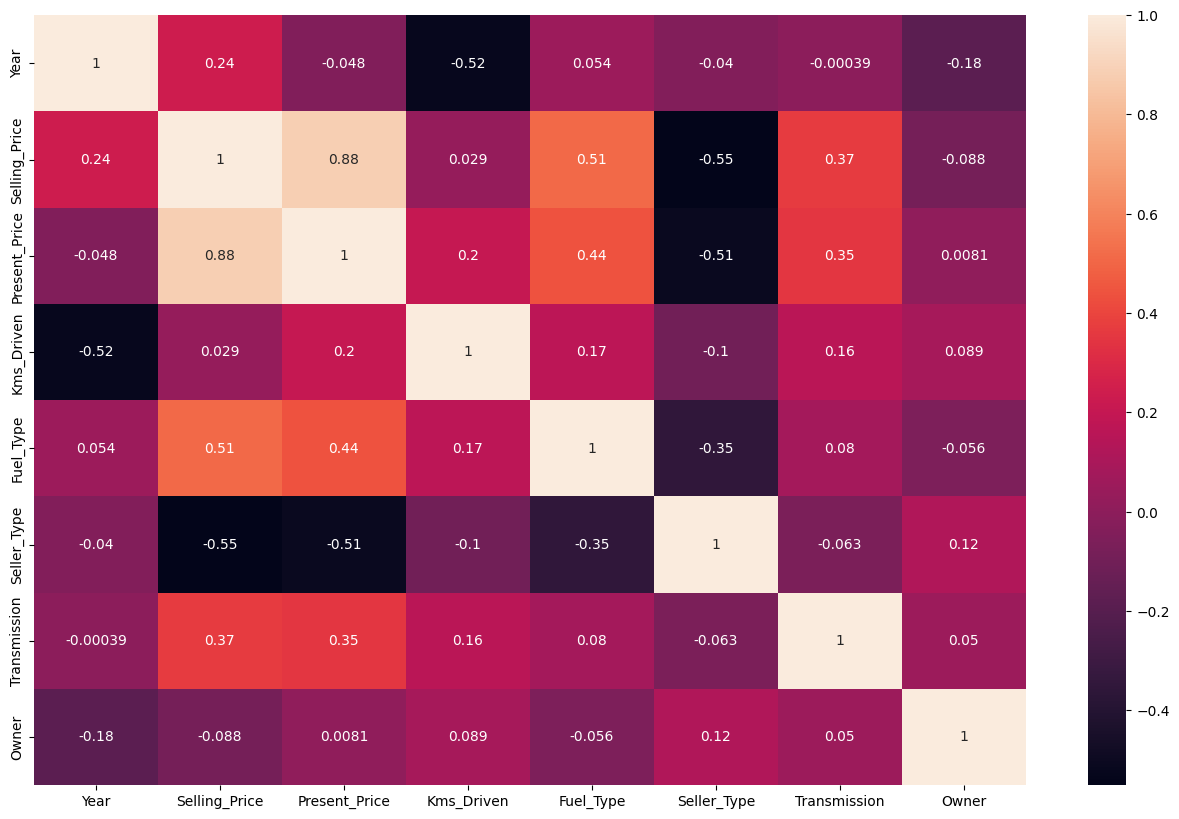

In [15]:
# show in heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
dfc = df.corr()
selling_price_corr = dfc['Selling_Price'].sort_values(ascending=False)
print(selling_price_corr)

Selling_Price    1.000000
Present_Price    0.878983
Fuel_Type        0.509467
Transmission     0.367128
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64


In [18]:
X=df['Present_Price'].values

X=X[:,np.newaxis]

Y=df['Selling_Price'].values

Y=Y[:,np.newaxis]

In [20]:
# splitting the data
# and train and test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=100)

In [21]:
lin_reg_model=LinearRegression()

In [22]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [23]:
# prediction model
training_data_prediction=lin_reg_model.predict(X_test)


In [25]:
# check min and max
Y.min(),Y.max()

(0.1, 35.0)

In [26]:
# preformance measures
error_score=metrics.r2_score(Y_test,training_data_prediction)
print(error_score)

0.6954180352835404


In [27]:
#check mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,training_data_prediction))

MAE 1.5737842183039095


In [28]:
# mean squared error (MSE)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(Y_test,training_data_prediction))


MSE 7.837784860540418


In [29]:
# RMSE

from sklearn.metrics import mean_squared_error
print("RMSE",np.sqrt(mean_squared_error(Y_test,training_data_prediction)))

RMSE 2.799604411437519


Text(0.5, 1.0, 'Actual prices vs  predicted prices (WITHOUT HANDLING OUTLIERS)')

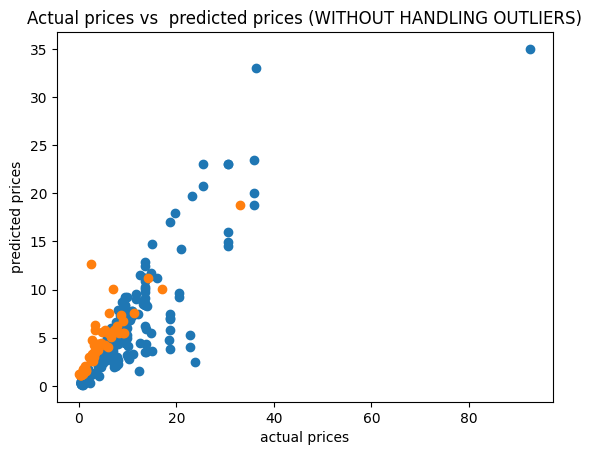

In [30]:
# Scatter Plot

plt.scatter(X,Y)
plt.scatter(Y_test,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("Actual prices vs  predicted prices (WITHOUT HANDLING OUTLIERS)")

In [31]:
print('Predicted Value :',training_data_prediction[0])
print('Actual Value :',Y_test[0])

Predicted Value : [1.12951494]
Actual Value : [0.12]


In [32]:
# Multiplw Linear regression
X=df.drop(['Selling_Price'],axis=1)
Y=df['Selling_Price']
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=100)

lin_reg_model=LinearRegression()

lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [37]:
training_data_prediction=lin_reg_model.predict(X_test)


In [39]:
# Predicting y Values from x
training_data_prediction=lin_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,training_data_prediction)
print(error_score)
print('Predicted Value :',training_data_prediction[0])
print('Actual Value :',Y_test.values[0])


0.7781497476037353
Predicted Value : -2.3890592764992107
Actual Value : 0.12


In [43]:
print("MAE",mean_absolute_error(Y_test,training_data_prediction))
print("MSE",mean_squared_error(Y_test,training_data_prediction))
print("RMSE",np.sqrt(mean_squared_error(Y_test,training_data_prediction)))

MAE 1.4369092209470988
MSE 5.708855910615735
RMSE 2.3893212238239827


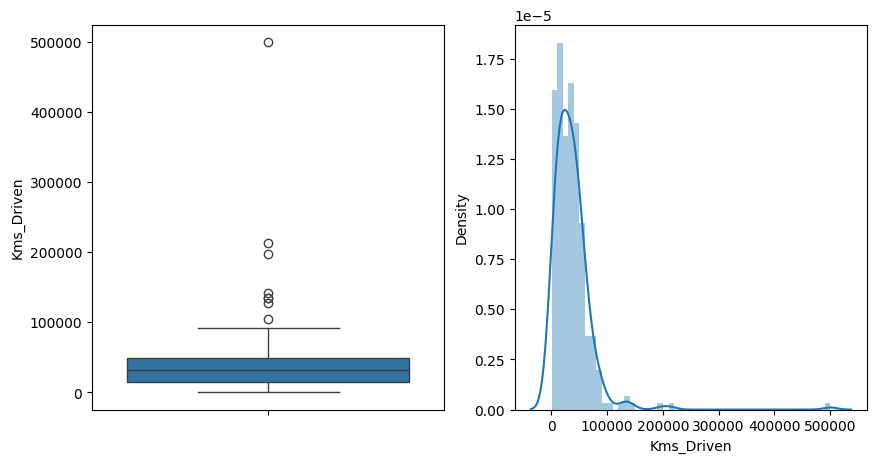

In [46]:
# PERFORMING LINEAR REGRESSION with MULTIPLE LINEAR REGRESSION NOW With HANDLING OUTLIERS
# DETECTING AND HANDLING OUTLIERS  Using (Box plot)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['Kms_Driven'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['Kms_Driven'])


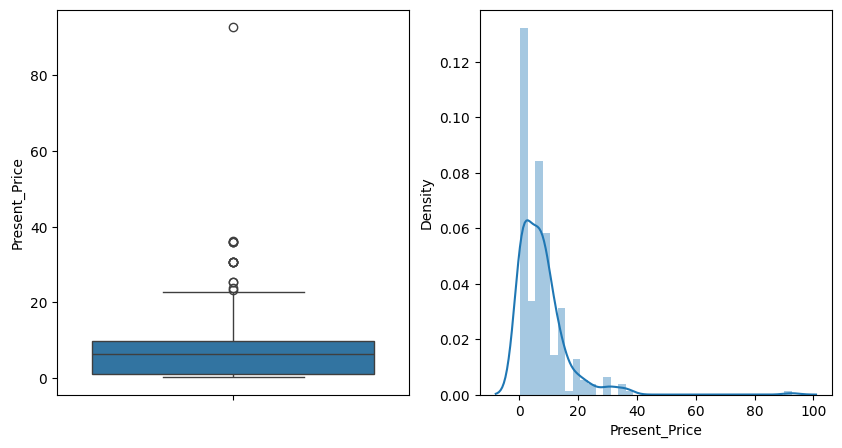

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['Present_Price'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['Present_Price'])

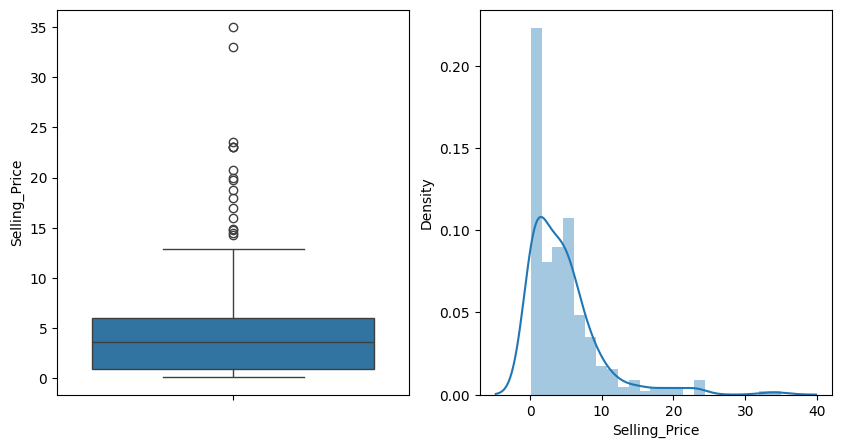

In [48]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['Selling_Price'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['Selling_Price'])

<Axes: >

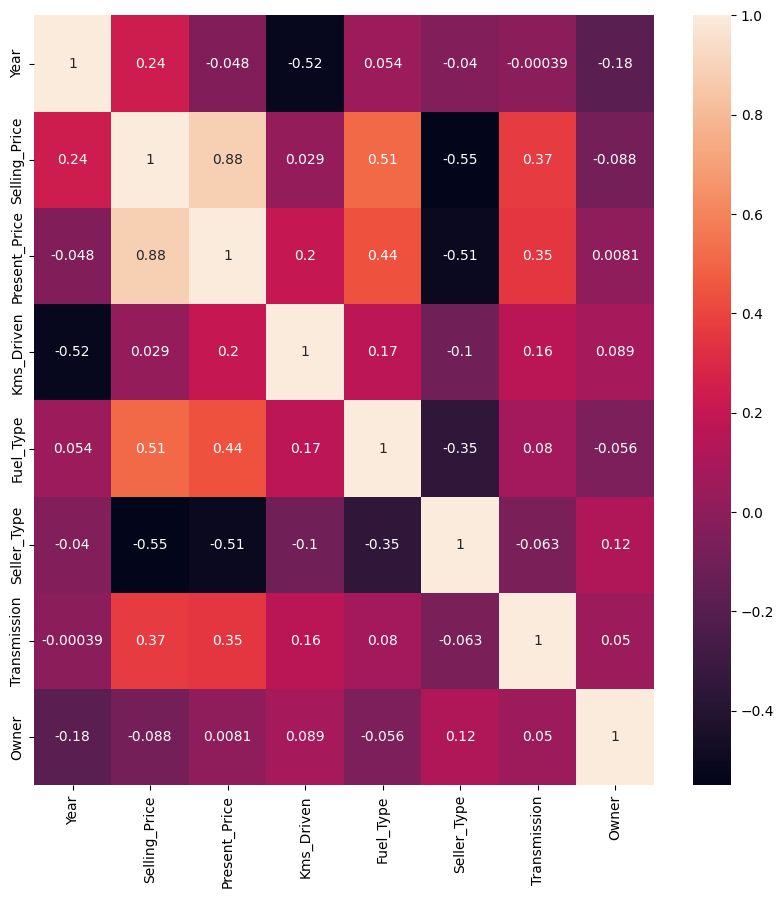

In [49]:
# CHECKING CORRELATION
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True)

In [52]:
dfc=df.corr()
dfc["Selling_Price"].sort_values(ascending=False)


Selling_Price    1.000000
Present_Price    0.878983
Fuel_Type        0.509467
Transmission     0.367128
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64

In [53]:
X=df['Present_Price'].values
X=X[:,np.newaxis]
Y=df['Selling_Price'].values
Y=Y[:,np.newaxis]


In [55]:
# DATA SPLITTING
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=100)

lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [58]:
# Make Predictions on Test data   check min and max prediction
training_data_prediction=lin_reg_model.predict(X_test)
Y.min(),Y.max()

(0.1, 35.0)

In [59]:
# Performance Measures
error_score=metrics.r2_score(Y_test,training_data_prediction)
print(error_score)
print("MAE",mean_absolute_error(Y_test,training_data_prediction))
print("MSE",mean_squared_error(Y_test,training_data_prediction))
print("RMSE",np.sqrt(mean_squared_error(Y_test,training_data_prediction)))

0.7384040461800082
MAE 1.4832877027765292
MSE 6.707461090220559
RMSE 2.589876655406693


Text(0.5, 1.0, 'Actual prices vs  predicted prices')

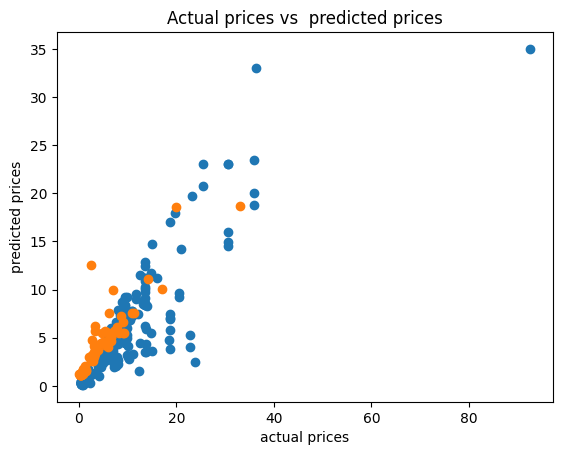

In [60]:
# Scatter Plot
plt.scatter(X,Y)
plt.scatter(Y_test,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("Actual prices vs  predicted prices")

In [61]:
print('Predicted Value :',training_data_prediction[0])
print('Actual Value :',Y_test[0])

Predicted Value : [1.12800165]
Actual Value : [0.12]


In [62]:
# MULTIPLE LINEAR REGRESSION
X=df.drop(['Selling_Price'],axis=1)
Y=df['Selling_Price']
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [64]:
# SPLITTING TRAINING AND TEST DATA
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=100)

lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)




LinearRegression()

In [65]:
training_data_prediction=lin_reg_model.predict(X_test)

In [66]:
error_score=metrics.r2_score(Y_test,training_data_prediction)
print(error_score)

0.8149484853737605


In [67]:
print('Predicted Value :',training_data_prediction[0])
print('Actual Value :',Y_test.values[0])
print("MAE",mean_absolute_error(Y_test,training_data_prediction))
print("MSE",mean_squared_error(Y_test,training_data_prediction))
print("RMSE",np.sqrt(mean_squared_error(Y_test,training_data_prediction)))


Predicted Value : -2.399396203745482
Actual Value : 0.12
MAE 1.2885758598025536
MSE 4.744820460395917
RMSE 2.1782608797836676
